# Linear Regression

Dataset: [Boston House Prices](https://www.kaggle.com/datasets/vikrishnan/boston-house-prices) | [CSV](/datasets/boston.xls)

Video: [Stanford CS229: Machine Learning - Linear Regression and Gradient Descent](https://www.youtube.com/watch?v=4b4MUYve_U8&list=PLoROMvodv4rMiGQp3WXShtMGgzqpfVfbU&index=2)

In [12]:
import typing

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
def least_mean_squares(
    params: np.ndarray,
    X_train: np.ndarray,
    y_train: np.ndarray,
    hypothesis_func: typing.Callable[[np.ndarray, np.ndarray], np.floating],
    *,
    learning_rate: float = 0.001,
) -> np.ndarray:
    """
    Implements Gradient Descent using the Least Mean Squares cost function.
    (Widrow-Hoff learning rule).
    """

    prev = params.copy()
    converged = False

    while not converged:
        for j, param in enumerate(params):
            params[j] = param + (learning_rate * (sum(
                ((y_train[i] - hypothesis_func(params, X_train[i])) * (1 if j==0 else X_train[i][j-1])) for i in range(len(X_train))
            )))

        if np.array_equal(prev, params):
            converged = True
            break
        else:
            prev = params.copy()

    return params

In [10]:
class LinearRegression:
    def __init__(self):
        self.params = np.array([]) # intentional: empty

    def _predict(self, params: np.ndarray, X: np.ndarray) -> np.floating:
        return params[0] + sum(
            (X[i] * params[i+1]) for i in range(len(X))
        )
    
    def predict(self, X: np.ndarray):
        return self._predict(self.params, X)

    def fit(
        self,
        X_train: np.ndarray,
        y_train: np.ndarray
    ):
        initial = np.zeros(len(X_train[0]) + 1)
        self.params = least_mean_squares(
            initial,
            X_train,
            y_train,
            self._predict
        )


In [8]:
df = pd.read_csv("../datasets/boston.xls")
X, y = df[["NOX"]].to_numpy(), df[["MEDV"]].to_numpy()

In [11]:
model = LinearRegression()
model.fit(X, y)

/var/folders/2x/jhz5n62j1ldb7x0_f_q2424c0000gn/T/ipykernel_15245/19218145.py:19: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  params[j] = param + (learning_rate * (sum(


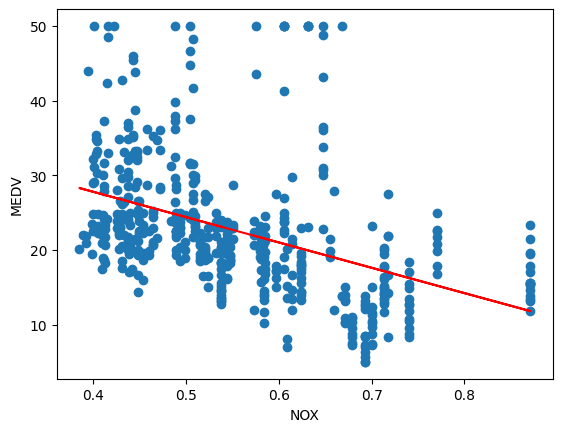

In [14]:
y_pred = [model.predict(row) for row in X]

plt.scatter(X, y)
plt.plot(X, y_pred, color="red")

plt.xlabel("NOX")
plt.ylabel("MEDV")

plt.show()